In [1]:
import pandas as pd 
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt
import numpy as np
import warnings
import seaborn as sns
import tqdm
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest

warnings.filterwarnings('ignore')

# Часть 1. Приоритизация гипотез.

Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [3]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


𝐼𝐶𝐸=(𝐼𝑚𝑝𝑎𝑐𝑡∗𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒)/𝐸𝑓𝑓𝑜𝑟𝑡𝑠
 
𝑅𝐼𝐶𝐸=(𝑅𝑒𝑎𝑟𝑐ℎ∗𝐼𝑚𝑝𝑎𝑐𝑡∗𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒)/𝐸𝑓𝑓𝑜𝑟𝑡𝑠

In [4]:
df['ice'] = (df['Impact']*df['Confidence'])/ df['Efforts']

In [5]:
df['rice'] = (df['Impact']*df['Confidence']*df['Reach'])/ df['Efforts']

In [6]:
ice = df[['Hypothesis','ice']].sort_values(by='ice', ascending = False)
rice = df[['Hypothesis','rice']].sort_values(by='rice', ascending = False)

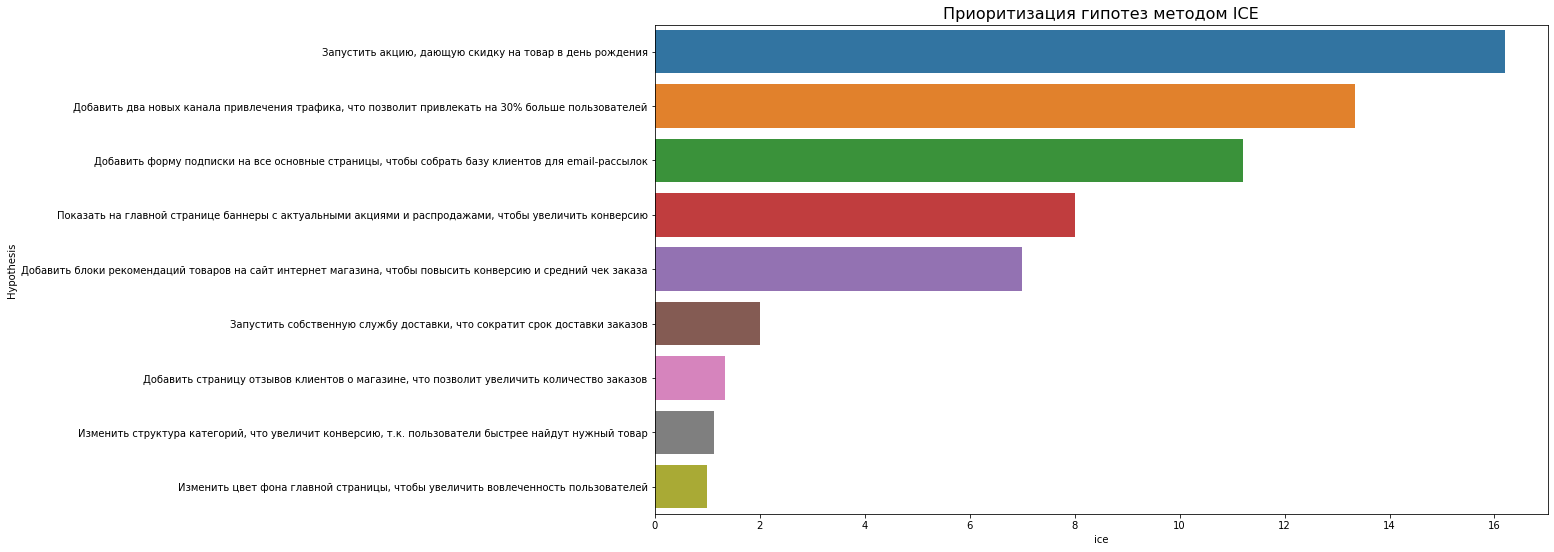

In [7]:
plt.figure(figsize = (16, 9))
sns.barplot(data=ice,y='Hypothesis', x='ice')
plt.title('Приоритизация гипотез методом ICE', fontsize = 16)
plt.show()

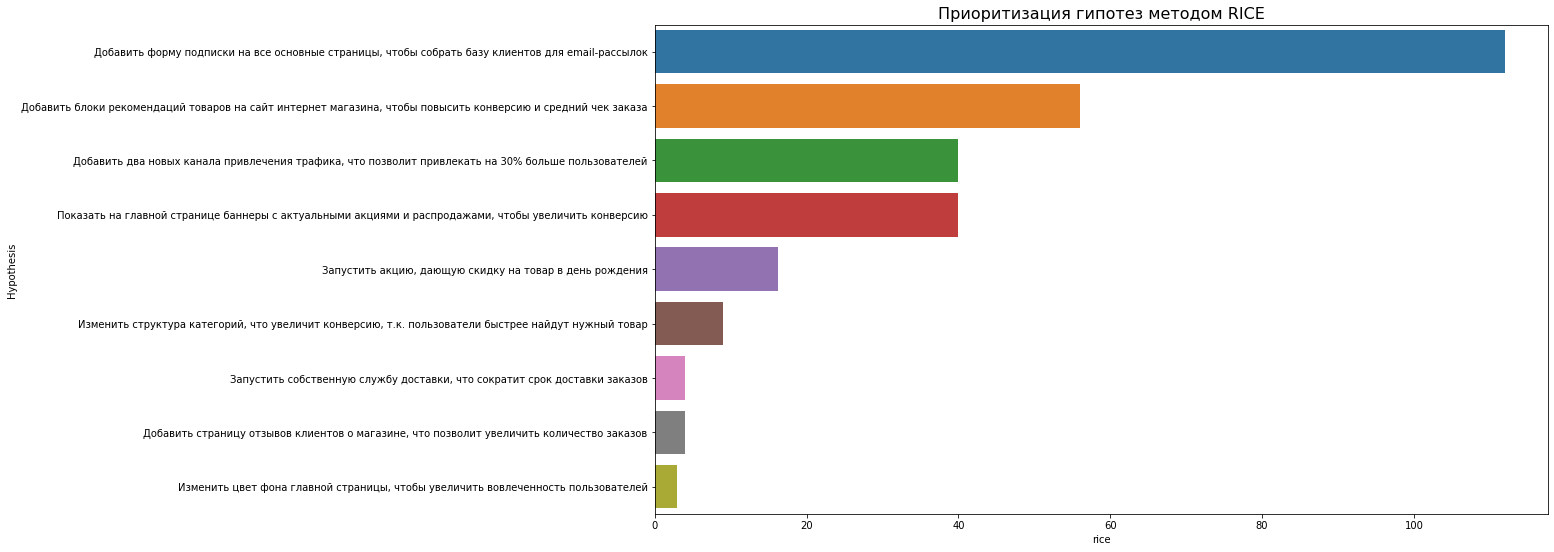

In [8]:
plt.figure(figsize = (16, 9))
sns.barplot(data=rice,y='Hypothesis', x='rice')
plt.title('Приоритизация гипотез методом RICE', fontsize = 16)
plt.show()

Как видно, 8 гипотеза стала лишь 5 в расчете по второму алгоритму. Как я полагаю, причина заключатеся именно в охвате. Скидка на товар затронет только тех, кто зайдет на страницу этого товара, в то время как форма подписки на всех основных страницах затронет почти всех. Отсюда и более высокий приоритет при сравнительно равных показателях других столбцов. Аналогичная логика применима и к остальным гипотезам. 

## Часть 2. Анализ A/B-теста

Построим график кумулятивной выручки по группам.

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.groupby('group')['visitors'].sum() #довольно хорошое распределение по группам

group
A    18736
B    18916
Name: visitors, dtype: int64

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
orders.duplicated().sum()

0

In [18]:
visitors.duplicated().sum()

0

На первый взгляд кажется, что данные в порядке. Думаю на этом проверку можно прекратить. 

In [19]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Также, проверим данные на аномальные значения.

In [21]:
users_a = orders[orders['group']=='A'][['visitorId']].drop_duplicates()
users_b = orders[orders['group']=='B'][['visitorId']].drop_duplicates()
intersection = users_a.merge(users_b, on = 'visitorId', how = 'inner')


In [22]:
print('Количество фликеров',len(intersection))
print('Доля фликеров','{0:.2%}'.format(len(intersection)/ orders['visitorId'].nunique()))
#хмм, у нас получилось 58 фликеров и 5,6 % от всего датасета, я бы их просто удалил

Количество фликеров 58
Доля фликеров 5.63%


In [23]:
#orders['revenue'].hist()

In [24]:
orders = orders[~orders['visitorId'].isin(intersection['visitorId'])] # удаляем фликеров 
len(orders)

1016

In [25]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_A']

In [27]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)

In [28]:
visitorsACummulative.columns = ['date', 'visitors_cumm_A']

In [29]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_B']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitors_cumm_B']

In [30]:
visitorsADaily.head()

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [31]:
visitorsACummulative.head()

,date,visitors_cumm_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [32]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [33]:
ordersADaily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [34]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

In [35]:
ordersBDaily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [36]:
#Куммулятивные показатели заказов и выручки для группы А
orders_a_cumm = (ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}),axis=1,)
                                                                                             .sort_values(by=['date']))

orders_a_cumm.columns = ['date','orders_cumm_A','revenue_cumm_A',]

In [37]:
orders_a_cumm.head()

,date,orders_cumm_A,revenue_cumm_A
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [38]:
#Куммулятивные показатели заказов и выручки для группы B
orders_b_cumm = (ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}),axis=1,)
                                                                                             .sort_values(by=['date']))

orders_b_cumm.columns = ['date','orders_cumm_B','revenue_cumm_B']

In [39]:
orders_b_cumm.head()

,date,orders_cumm_B,revenue_cumm_B
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [40]:
rev_agg = (orders_a_cumm.merge(orders_b_cumm, left_on = 'date', right_on = 'date', how = 'left')
                       
          )

In [41]:
rev_agg.head()

,date,orders_cumm_A,revenue_cumm_A,orders_cumm_B,revenue_cumm_B
0,2019-08-01,23,142779,17,59758
1,2019-08-02,42,234381,40,221801
2,2019-08-03,66,346854,54,288850
3,2019-08-04,77,388030,68,385740
4,2019-08-05,99,474413,89,475648


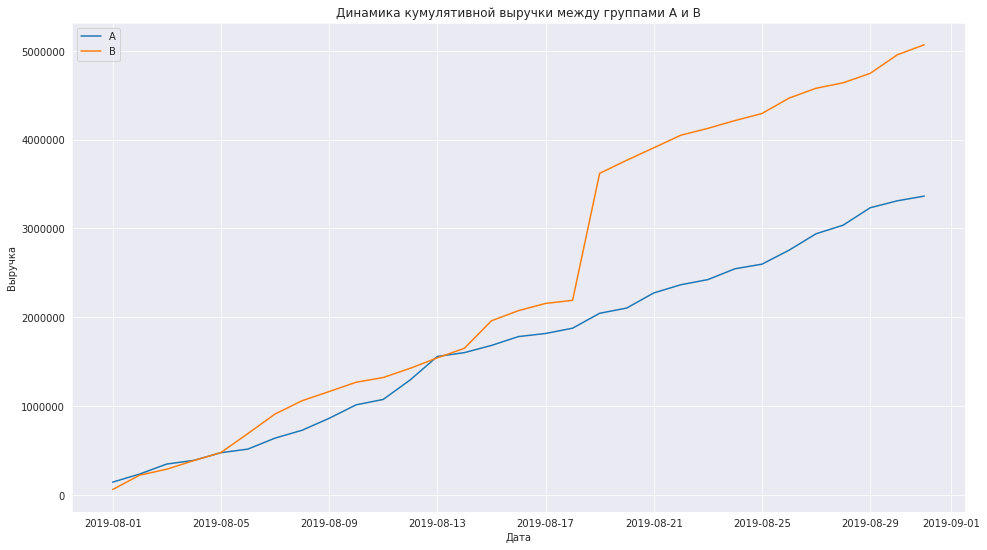

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.lineplot(data=rev_agg, x='date',y='revenue_cumm_A')
sns.lineplot(data=rev_agg, x='date',y='revenue_cumm_B')
plt.legend(['A','B'])
plt.title('Динамика кумулятивной выручки между группами А и В')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

Как мы видим, выручка группы В заметно выросла после 17 августа, однако это может говорить о наличии выбросов. И мы это видели, такие заказы действительно есть.

Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

In [43]:
rev_agg['avg_rcpt_A'] = rev_agg['revenue_cumm_A'] / rev_agg['orders_cumm_A']
rev_agg['avg_rcpt_B'] = rev_agg['revenue_cumm_B'] / rev_agg['orders_cumm_B']

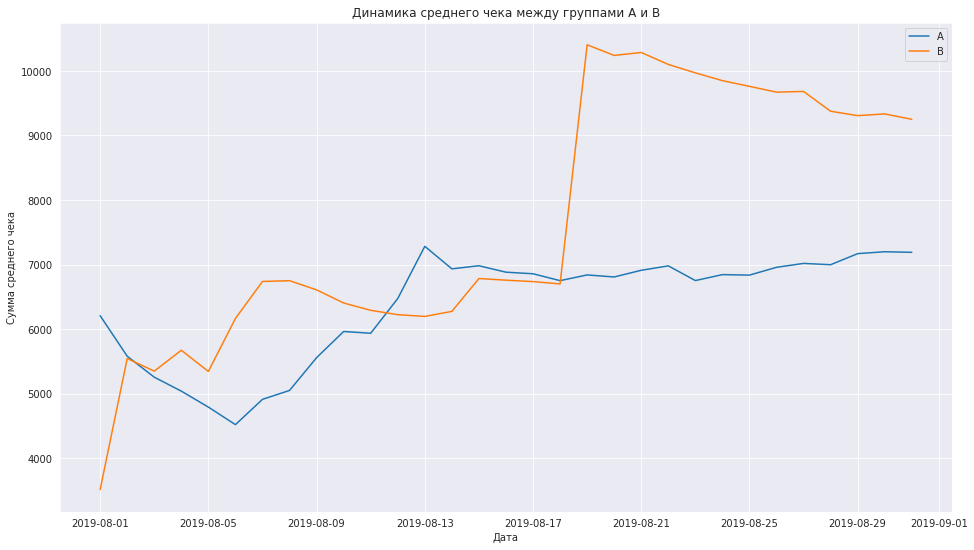

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.lineplot(data=rev_agg, x='date',y='avg_rcpt_A')
sns.lineplot(data=rev_agg, x='date',y='avg_rcpt_B')
plt.legend(['A','B'])
plt.title('Динамика среднего чека между группами А и В')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Дата')
plt.show()

Ну точно выбросы

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

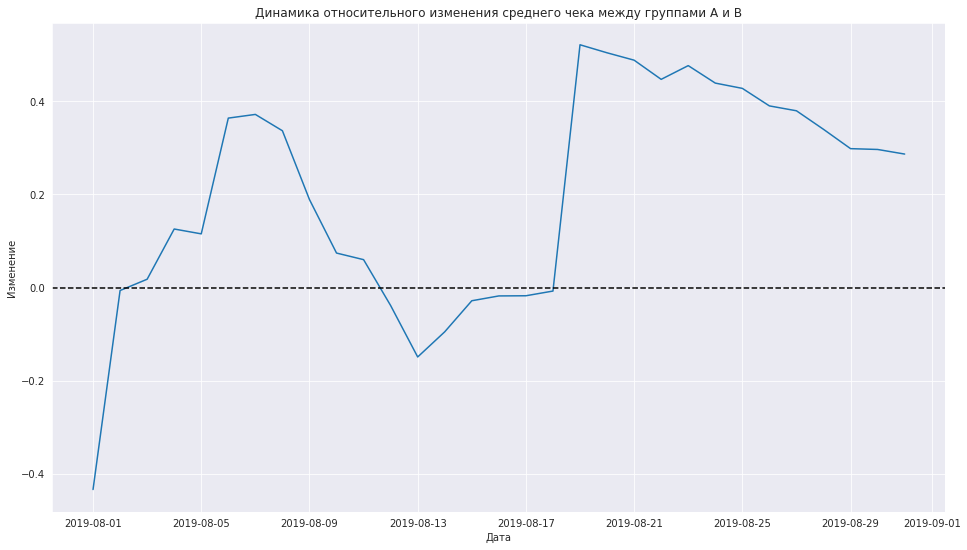

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.lineplot(data=rev_agg, x='date',y=(rev_agg['avg_rcpt_B']/rev_agg['avg_rcpt_A']-1))
plt.title('Динамика относительного изменения среднего чека между группами А и В')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Изменение')
plt.xlabel('Дата')
plt.show()

График сильно колеблется. Трудно выделить какой-либо тренд

Построим график кумулятивной конверсии по группам.

In [46]:
#к данному датафрейму осталось только добавить информацию по юзерам, которых мы расчитали ранее
rev_agg.head() 

,date,orders_cumm_A,revenue_cumm_A,orders_cumm_B,revenue_cumm_B,avg_rcpt_A,avg_rcpt_B
0,2019-08-01,23,142779,17,59758,6207.782609,3515.176471
1,2019-08-02,42,234381,40,221801,5580.500000,5545.025000
2,2019-08-03,66,346854,54,288850,5255.363636,5349.074074
3,2019-08-04,77,388030,68,385740,5039.350649,5672.647059
4,2019-08-05,99,474413,89,475648,4792.050505,5344.359551


In [47]:
data = (rev_agg.merge(visitorsADaily, left_on ='date', right_on = 'date',how = 'left')
               .merge(visitorsACummulative, left_on ='date', right_on = 'date', how='left')   
               .merge(visitorsBDaily,left_on ='date', right_on = 'date', how = 'left')     
               .merge(visitorsBCummulative, left_on ='date', right_on = 'date', how='left')      
       )

In [48]:
data.head() #готово

,date,orders_cumm_A,revenue_cumm_A,orders_cumm_B,revenue_cumm_B,avg_rcpt_A,avg_rcpt_B,visitors_per_date_A,visitors_cumm_A,visitors_per_date_B,visitors_cumm_B
0,2019-08-01,23,142779,17,59758,6207.782609,3515.176471,719,719,713,713
1,2019-08-02,42,234381,40,221801,5580.500000,5545.025000,619,1338,581,1294
2,2019-08-03,66,346854,54,288850,5255.363636,5349.074074,507,1845,509,1803
3,2019-08-04,77,388030,68,385740,5039.350649,5672.647059,717,2562,770,2573
4,2019-08-05,99,474413,89,475648,4792.050505,5344.359551,756,3318,707,3280


In [49]:
data['conversion_A'] = data['orders_cumm_A'] / data['visitors_cumm_A']
data['conversion_B'] = data['orders_cumm_B'] / data['visitors_cumm_B']

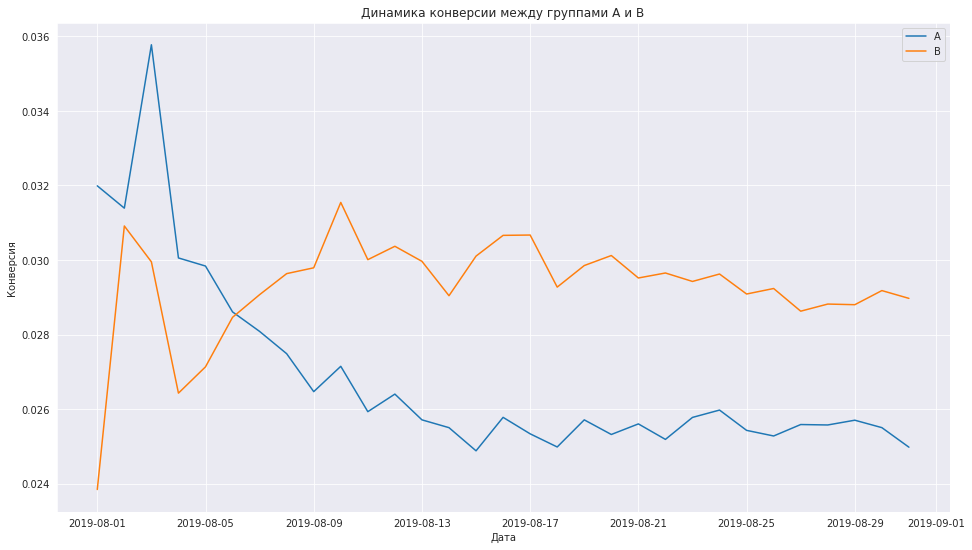

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.lineplot(data=data, x='date',y='conversion_A')
sns.lineplot(data=data, x='date',y='conversion_B')
plt.legend(['A','B'])
plt.title('Динамика конверсии между группами А и В')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.show()

Сперва конверсии колебались, потом группа А стала сильно снижаться, В же наоборот выглядит заметно лучше.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

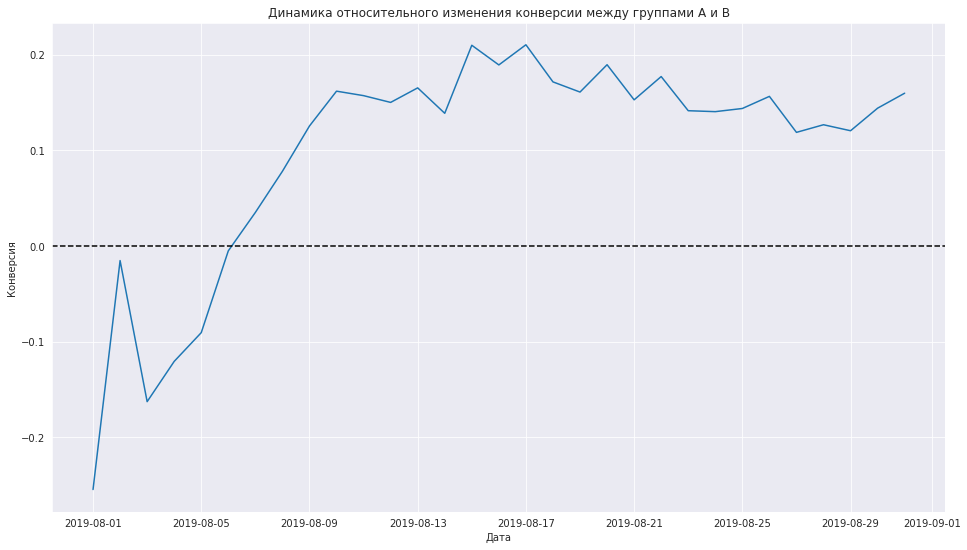

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 9))
sns.lineplot(data=data, x='date',y=(data['conversion_B']/data['conversion_A']-1))
plt.title('Динамика относительного изменения конверсии между группами А и В')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.show()

В целом график отображает тот же вывод, группа В демонстрирует более высокую конверсию 

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [52]:
orders_by_users = orders.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
orders_by_users.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


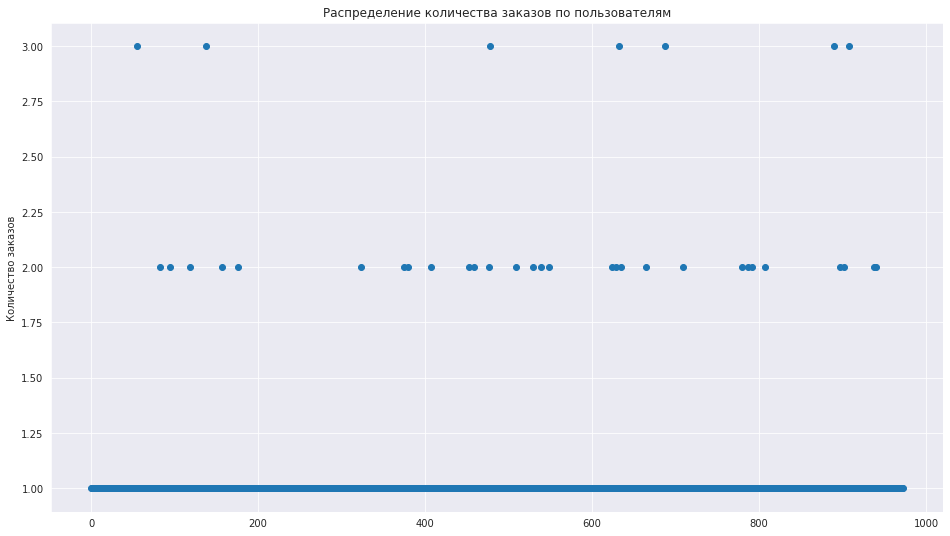

In [53]:
x_values = pd.Series(range(0,len(orders_by_users['visitorId'])))
plt.figure(figsize = (16, 9))
plt.scatter(x_values, orders_by_users['transactionId'])
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов по пользователям')
plt.show()


Как мы видим, есть довольно много людей с 3 заказами, больше уже реже, но не единичные случаи

In [54]:
print(np.percentile(orders_by_users['transactionId'], [90, 95, 99])) 

[1. 1. 2.]


Не более 10% имеют больше 1 заказов, не более 5% 2 заказа и не более 1% больше 4 заказов. 

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

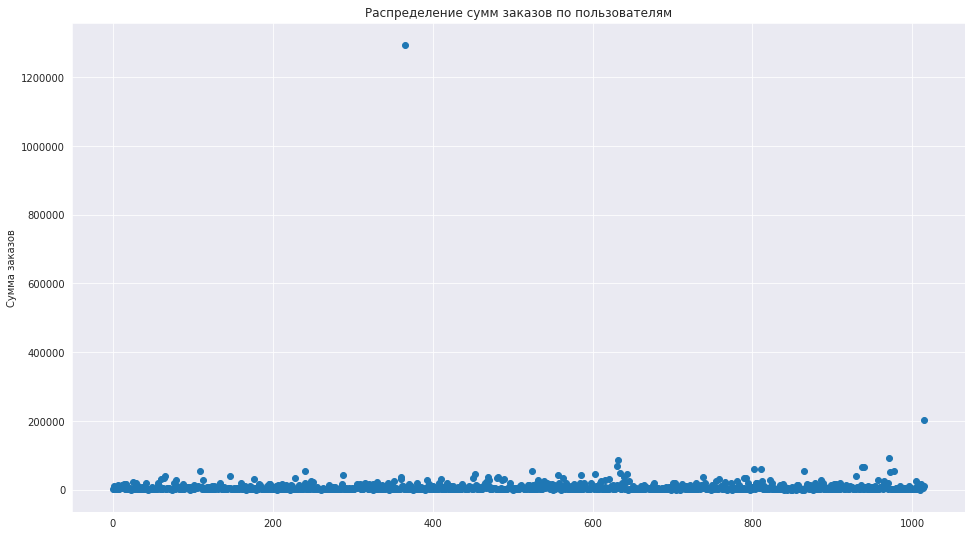

In [55]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (16, 9))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Сумма заказов')
plt.title('Распределение сумм заказов по пользователям')
plt.show() 

есть пара человек с аномальными заказами суммой выше 1200000, а также один слегка выше основного тренда суммой примерно 200000, чтобы понять много это или еще норма, предлагаю рассчитать перцентили.

In [56]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


Не более 10% имеют заказы выше 18168 ед., не более 5% 28000ед. и не более 1% 58233.2 ед. , значит человек с заказом около 200000 все таки выброс. 

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [57]:
AB_raw = (orders.groupby('group').agg({'transactionId':pd.Series.nunique})
                                           .reset_index()
                                           .merge(visitors.groupby('group').agg({'visitors':'sum'}).reset_index(), on ='group')
                                           .rename(columns={'transactionId':'orders'})
                   )

In [58]:
AB_raw['conversion'] = AB_raw['orders']/AB_raw['visitors']
AB_raw

,group,orders,visitors,conversion
0,A,468,18736,0.024979
1,B,548,18916,0.028970


In [59]:
count = AB_raw['orders'].tolist()
nobs = AB_raw['visitors'].tolist()
z_test = proportions_ztest(count, nobs)


Данный тест проверяет нулевую гипотезу о равенстве долей в генеральной совокупности. Таким образом, альтернативная гипотеза - доли в ген. совокупности не равны. 

In [60]:
print(AB_raw[['group','conversion']])
print(z_test[1])
if z_test[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной о неравенстве долей')
else: 
    print('Не удалось отвергнуть нулевую гипотезу')

  group  conversion
0     A    0.024979
1     B    0.028970
0.01685138043470311
Нулевая гипотеза отвергается в пользу альтернативной о неравенстве долей


Итак мы видим, что различия в конверсии между группами А и В статистически значимые. Судя по всему группа В показывает более высокий уровень конверсий.

In [61]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [62]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сперва проверим распределение выручки на нормальность. Здесь нулевая гипотеза предполагает нормальное распределение данных, соотвественно альтернативная говорит о том, что данные распределены ненормально.

In [63]:
shap_a = st.shapiro(orders[orders['group']=='A']['revenue'])

In [64]:
print(shap_a[1])
if shap_a[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной о ненормальном распределении')
else: 
    print('Не удалось отвергнуть нулевую гипотезу о нормальности распределения')

2.8240222045454137e-31
Нулевая гипотеза отвергается в пользу альтернативной о ненормальном распределении


In [65]:
shap_b = st.shapiro(orders[orders['group']=='B']['revenue'])

In [66]:
print(shap_b[1])
if shap_b[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной о ненормальном распределении')
else: 
    print('Не удалось отвергнуть нулевую гипотезу о нормальности распределения')

4.203895392974451e-45
Нулевая гипотеза отвергается в пользу альтернативной о ненормальном распределении


Будем использовать критерий Манна-Уитни. Нулевая гипотеза твердит, что средние ранги по выручке между группами не отличаются, альтернативная: средние ранги отличаются. 

In [67]:
mwt = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'], alternative = 'two-sided')

In [68]:
print('p-value',mwt[1])
print('A mean',orders[orders['group']=='A']['revenue'].mean()) 
print('B mean',orders[orders['group']=='B']['revenue'].mean())
if mwt[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной неравенстве средних рангов')
else: 
    print('Не удалось отвергнуть нулевую гипотезу о равенстве средних рангов ')

p-value 0.8294908998149533
A mean 7189.4358974358975
B mean 9249.94890510949
Не удалось отвергнуть нулевую гипотезу о равенстве средних рангов 


Получается, что мы не можем сделать вывод о статистически значимом различии в среднем чеке между группами А и В

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

В качестве выбросов определим юзеров, у которых больше 4 заказов или сумма заказа больше 58233 ед.

In [69]:
many_orders = orders_by_users[orders_by_users['transactionId']>4]['visitorId']
print(len(many_orders)) # всего 10 человек

0


In [70]:
expensive_orders = orders[orders['revenue']>58233]['visitorId']
print(len(expensive_orders)) #а тут 12 

9


In [71]:
abnormal_users = pd.concat([many_orders, expensive_orders],axis = 0).drop_duplicates().sort_values()
print(len(abnormal_users)) #всего 21

9


In [72]:
#очистим данные
AB_cleared = (orders[np.logical_not(orders['visitorId'].isin(abnormal_users))].groupby('group').agg({'transactionId':pd.Series.nunique})
                                           .reset_index()
                                           .merge(visitors.groupby('group').agg({'visitors':'sum'}).reset_index(), on ='group')
                                           .rename(columns={'transactionId':'orders'})
                   )

In [73]:
AB_cleared['conversion'] = AB_cleared['orders'] / AB_cleared['visitors']

AB_cleared

,group,orders,visitors,conversion
0,A,463,18736,0.024712
1,B,544,18916,0.028759


In [74]:
orders_cleared = orders[np.logical_not(orders['visitorId'].isin(abnormal_users))]

In [75]:
orders_cleared.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [76]:
count = AB_cleared['orders'].tolist()
nobs = AB_cleared['visitors'].tolist()
z_test = proportions_ztest(count, nobs)

H0: доли в ген. совокупности равны

Н1: доли в ген. совокупности не равны

In [77]:
print(AB_cleared[['group','conversion']])
print(z_test[1])
if z_test[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной о неравенстве долей')
else: 
    print('Не удалось отвергнуть нулевую гипотезу')

  group  conversion
0     A    0.024712
1     B    0.028759
0.014948956970887294
Нулевая гипотеза отвергается в пользу альтернативной о неравенстве долей


похоже, что здесь очистка не привела к особому изменению

In [78]:
mwt = st.mannwhitneyu(orders_cleared[orders_cleared['group']=='A']['revenue'],orders_cleared[orders_cleared['group']=='B']['revenue'],  alternative = 'two-sided')

H0: Средние ранги среднего чека равны

Н1: Средние ранги среднего чека не равны

In [79]:
print('p-value',mwt[1])
print('A mean',orders_cleared[orders_cleared['group']=='A']['revenue'].mean()) 
print('B mean',orders_cleared[orders_cleared['group']=='B']['revenue'].mean())
if mwt[1]< 0.05:
    print('Нулевая гипотеза отвергается в пользу альтернативной неравенстве средних рангов')
else: 
    print('Не удалось отвергнуть нулевую гипотезу о равенстве средних рангов ')

p-value 0.9006884356560738
A mean 6504.548596112311
B mean 6298.827205882353
Не удалось отвергнуть нулевую гипотезу о равенстве средних рангов 


И здесь нет отличий. Тест все еще показывает, что средние ранги между группами не отличаются. Итого: что до, что после удаление аномалий, результаты особо не поменялись,однако средний чек стал меньше отличаться.  

# Выводы

Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Чтобы быть точно уверенным, посмотрим на динамики p-value.

In [80]:
dates = pd.to_datetime(pd.date_range(orders['date'].min(), orders['date'].max())).tolist()

In [81]:
p_vals_cr = []
p_vals_mwt = []

for dt in tqdm.tqdm(dates):
    orders_ab = orders_cleared[orders_cleared['date']<=dt]
    
    AB_cleared_AB = (             orders_ab.groupby('group').agg({'transactionId':pd.Series.nunique})
                                           .reset_index()
                                           .merge(visitors.groupby('group').agg({'visitors':'sum'}).reset_index(), on ='group')
                                           .rename(columns={'transactionId':'orders'})
                   )
    count = AB_cleared_AB['orders'].tolist()
    nobs = AB_cleared_AB['visitors'].tolist()
    p_val_cr = proportions_ztest(count, nobs)[1]
    p_vals_cr.append(p_val_cr)
    
    
    p_val_mwt = st.mannwhitneyu(orders_ab[orders_ab['group']=='A']['revenue'],orders_ab[orders_ab['group']=='B']['revenue'])[1]
    p_vals_mwt.append(p_val_mwt)
    

100%|██████████| 31/31 [00:00<00:00, 53.44it/s]


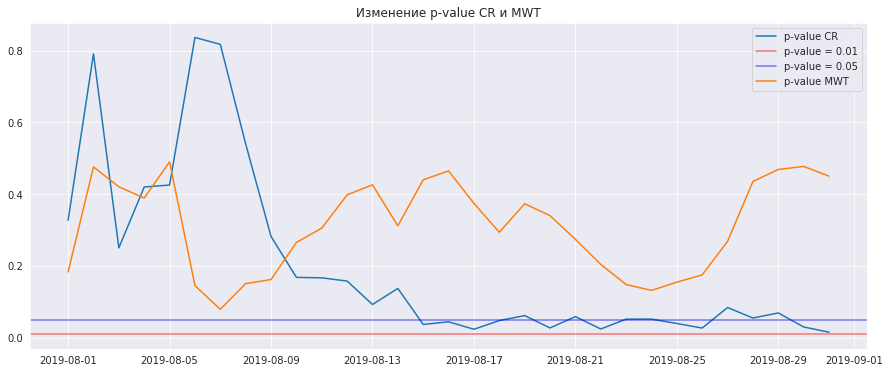

In [82]:
fig, ax = plt.subplots(figsize=(15,6))

plt.plot(dates, p_vals_cr, label='p-value CR')
plt.title('Изменение p-value CR и MWT')
plt.axhline(y=0.01, color='r', label='p-value = 0.01',alpha = 0.5)
plt.axhline(y=0.05, color='b', label='p-value = 0.05', alpha = 0.5)

plt.plot(dates, p_vals_mwt, label='p-value MWT')
plt.legend()
#plt.axhline(y=0.01, color='r', label='p-value = 0.01' )
#plt.axhline(y=0.05, color='b', label='p-value = 0.05')
plt.show()


Как видим, к 13 августа p-value для z теста для конверсий стабилизировался и едва ли там уже будут изменения. В то же время, p-value для Манна-Уитни все еще колеблетеся. Это говорит нам о том, что тест именно для этого показателя еще стоит подержать и возможо там еще появятся некоторые изменения. 

По итогу, можно сказать что тест определенно имеет эффект, как мы видим разица конверсии группы В статистически отличается от группы А. Более того, если смотреть кумуллятивные конверсии, видим, что группа А сильно падает. Возможно это следствие теста и потенциально это опасно и говорит, что стоит прекращать тест. В то же время, различия в среднем чеке статистически не значимы, но как показано на графике, критерий стат. значимости еще не стабилизировался, а значит, подержав тест дольше, мы можем зафиксировать новый результат. Какой будет мой вывод? Как мне кажется, едва ли разница в среднем чеке станет статистически различимой, а потеря конверсий одной из групп это потеря денег. Я бы рекомендовал все таки остановить тест и признать его частично успешным, конверсии изменились, средний чек нет.